In [1]:
import math


In [9]:
import numpy as np

def rotation_matrix(x_rotation, y_rotation, z_rotation):
    x_rotation = np.radians(x_rotation)
    y_rotation = np.radians(y_rotation)
    z_rotation = np.radians(z_rotation)

    Rx = np.array([[1, 0, 0],
                   [0, np.cos(x_rotation), -np.sin(x_rotation)],
                   [0, np.sin(x_rotation), np.cos(x_rotation)]])

    Ry = np.array([[np.cos(y_rotation), 0, np.sin(y_rotation)],
                   [0, 1, 0],
                   [-np.sin(y_rotation), 0, np.cos(y_rotation)]])

    Rz = np.array([[np.cos(z_rotation), -np.sin(z_rotation), 0],
                   [np.sin(z_rotation), np.cos(z_rotation), 0],
                   [0, 0, 1]])

    return np.dot(Rz, np.dot(Ry, Rx))

def create_general_polygon(n_sides, side_length, origin_coords, orientation):
    angles = [2 * math.pi * i / n_sides for i in range(n_sides)]
    coordinates = []
    rotation = rotation_matrix(*orientation)
    
    for angle in angles:
        local_x = side_length * math.cos(angle)
        local_y = side_length * math.sin(angle)
        local_z = 0

        local_coords = np.array([local_x, local_y, local_z])
        rotated_coords = np.dot(rotation, local_coords)
        global_coords = rotated_coords + origin_coords
        coordinates.append(tuple(global_coords))

    return coordinates

def create_sphere(radius, center_coords):
    coordinates = []
    
    for i in range(360):
        for j in range(180):
            theta = math.radians(i)
            phi = math.radians(j)
            x = center_coords[0] + radius * math.sin(phi) * math.cos(theta)
            y = center_coords[1] + radius * math.sin(phi) * math.sin(theta)
            z = center_coords[2] + radius * math.cos(phi)
            coordinates.append((x, y, z))
            
    return coordinates

def generate_shape_coordinates(shape, params, center_coords, orientation):
    if shape == 'polygon':
        return create_general_polygon(params['n_sides'], params['side_length'], center_coords, orientation)
    elif shape == 'sphere':
        return create_sphere(params['radius'], center_coords)
    else:
        raise ValueError("Invalid shape specified")

# Example usage:
shape = 'polygon'
params = {'n_sides': 5, 'side_length': 1}
center_coords = (0, 0, 0)
orientation = (0, 0, 45)

polygon_coords = generate_shape_coordinates(shape, params, center_coords, orientation)
print(polygon_coords)

[(0.7071067811865476, 0.7071067811865475, 0.0), (-0.4539904997395467, 0.8910065241883679, 0.0), (-0.9876883405951378, -0.15643446504023062, 0.0), (-0.15643446504023106, -0.9876883405951377, 0.0), (0.8910065241883677, -0.45399049973954697, 0.0)]


In [11]:
def ucl_format_coordinates(shape, params, center_coords, material_type, component_group, comment, reflectivity, specularity):
    coordinates = generate_shape_coordinates(shape, params, center_coords, orientation)
    
    n_points = len(coordinates)
    header_line = f"{n_points} // {material_type:03d} {component_group:04d} {comment}"
    
    coordinate_lines = "\n".join(" ".join(f"{coord:.3f}" for coord in point) for point in coordinates)
    final_line = f"{reflectivity:.1f} {specularity:.1f}"
    
    return f"{header_line}\n{n_points}\n{coordinate_lines}\n{final_line}"

# Example usage:
shape = 'polygon'
params = {'n_sides': 5, 'side_length': 1}
center_coords = (0, 0, 0)
orientation = (0, 0, 45)
material_type = 1
component_group = 1
comment = "pentagon covered in MLI"
reflectivity = 0.1
specularity = 0.5

formatted_coords = ucl_format_coordinates(shape, params, center_coords, material_type, component_group, comment, reflectivity, specularity)
print(formatted_coords)


5 // 001 0001 pentagon covered in MLI
5
0.707 0.707 0.000
-0.454 0.891 0.000
-0.988 -0.156 0.000
-0.156 -0.988 0.000
0.891 -0.454 0.000
0.1 0.5


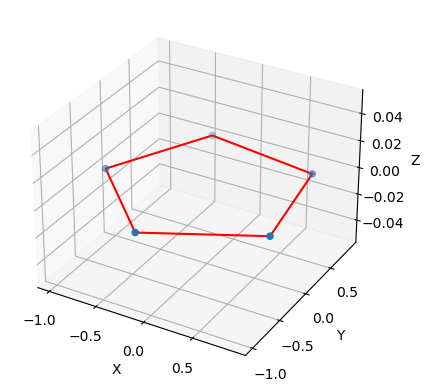

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_shape(shape, params, center_coords, orientation):
    coordinates = generate_shape_coordinates(shape, params, center_coords, orientation)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    xs, ys, zs = zip(*coordinates)
    ax.scatter(xs, ys, zs)
    
    if shape == 'polygon':
        xs, ys, zs = zip(*coordinates, coordinates[0])  # Add the first coordinate again to close the polygon
        ax.plot(xs, ys, zs, color='r', linestyle='-')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.show()

# Example usage:
shape = 'polygon'
params = {'n_sides': 5, 'side_length': 1}
center_coords = (0, 0, 0)
orientation = (0, 0, 45)


plot_shape(shape, params, center_coords, orientation)


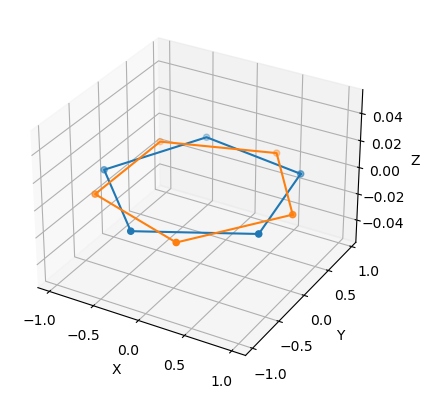

In [13]:
def plot_shapes(shapes_data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    for shape_data in shapes_data:
        shape, params, center_coords, orientation = shape_data
        coordinates = generate_shape_coordinates(shape, params, center_coords, orientation)

        xs, ys, zs = zip(*coordinates)
        ax.scatter(xs, ys, zs)

        if shape == 'polygon':
            xs, ys, zs = zip(*coordinates, coordinates[0])  # Add the first coordinate again to close the polygon
            ax.plot(xs, ys, zs, linestyle='-')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Example usage:
shapes_data = [
    ('polygon', {'n_sides': 5, 'side_length': 1}, (0, 0, 0), (0, 0, 45)),
    ('polygon', {'n_sides': 5, 'side_length': 1}, (0, 0, 0), (0, 0, 0))
]

plot_shapes(shapes_data)
